# Description

This notebook takes the combined csv file that has info about minutes played and team, season, week, opponent, home/away, and player names, and calculates accuracy of simple predictive models that:
- Take last 5 weeks average minutes played. 
- Same but if injured, no minutes played.

Overall, seems like the model that takes into account injuries is better, but only slightly

In [1]:
import pandas as pd
import numpy as np
import os
from utils import last_weeks_avg, get_predicted_minutes_rmse

In [2]:
# Load the combined data
csv_path = ('../datasets/black_dataframe/player_minutes_with_extra_columns_2425.csv')

df = pd.read_csv(csv_path)

In [3]:
weeks = 5

# Apply the function to calculate the last 5 weeks average
df = last_weeks_avg(df, weeks=weeks)

In [4]:
# If injury, then set predicted minutes to 0
df[f'avg_weeks_last_{weeks}_mean_injury']   = df[f'avg_weeks_last_{weeks}_mean'].where(df['reason'] != 'injury', 0)
df[f'avg_weeks_last_{weeks}_median_injury'] = df[f'avg_weeks_last_{weeks}_median'].where(df['reason'] != 'injury', 0)

In [5]:
# Calculate the RMSE between minutes_played and last_weeks_avg
rmse_last_weeks_mean        = get_predicted_minutes_rmse(df, minutes_column='minutes', predicted_column=f'avg_weeks_last_{weeks}_mean')
rmse_last_weeks_mean_injury = get_predicted_minutes_rmse(df, minutes_column='minutes', predicted_column=f'avg_weeks_last_{weeks}_mean_injury')

rmse_last_weeks_mean_exclude_zero_min_players        = get_predicted_minutes_rmse(df, 
                                                                             minutes_column='minutes', 
                                                                             predicted_column=f'avg_weeks_last_{weeks}_mean',
                                                                             exclude_zero_min_players=True)
rmse_last_weeks_mean_injury_exlude_zero_min_players  = get_predicted_minutes_rmse(df, 
                                                                             minutes_column='minutes', 
                                                                             predicted_column=f'avg_weeks_last_{weeks}_mean_injury',
                                                                             exclude_zero_min_players=True)

# Calculate the RMSE between minutes_played and last_weeks_avg
rmse_last_weeks_median        = get_predicted_minutes_rmse(df, minutes_column='minutes', predicted_column=f'avg_weeks_last_{weeks}_median')
rmse_last_weeks_median_injury = get_predicted_minutes_rmse(df, minutes_column='minutes', predicted_column=f'avg_weeks_last_{weeks}_median_injury')

rmse_last_weeks_median_exclude_zero_min_players        = get_predicted_minutes_rmse(df, 
                                                                             minutes_column='minutes', 
                                                                             predicted_column=f'avg_weeks_last_{weeks}_median',
                                                                             exclude_zero_min_players=True)
rmse_last_weeks_median_injury_exlude_zero_min_players  = get_predicted_minutes_rmse(df, 
                                                                             minutes_column='minutes', 
                                                                             predicted_column=f'avg_weeks_last_{weeks}_median_injury',
                                                                             exclude_zero_min_players=True)



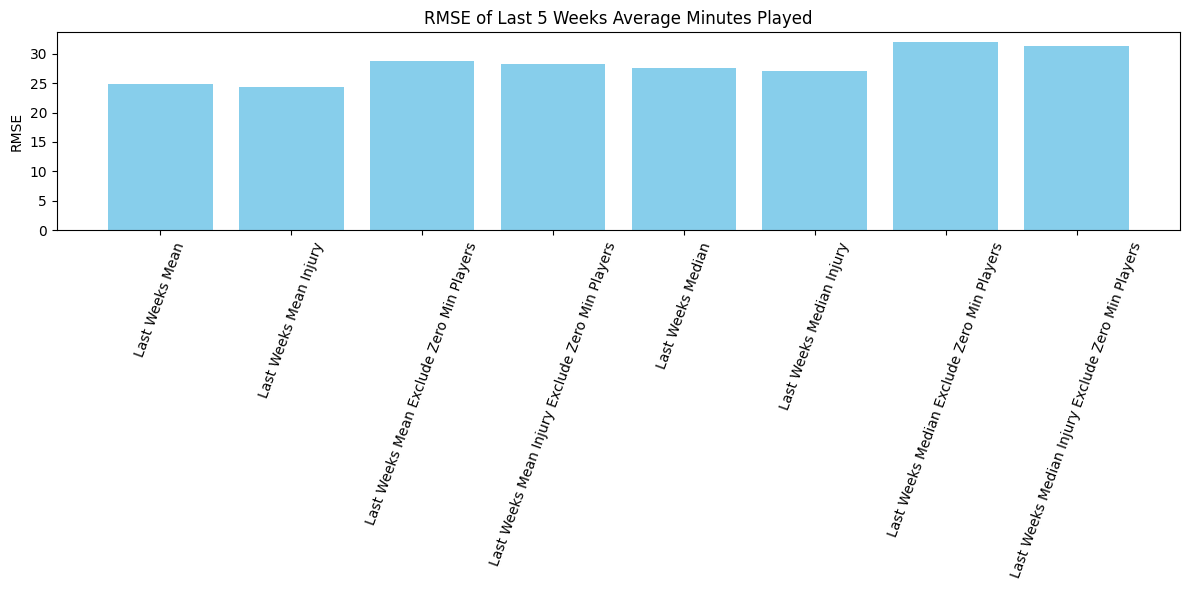

In [7]:
# Plot a bar chart of the RMSE values
import matplotlib.pyplot as plt
rmse_values = {
    'Last Weeks Mean': rmse_last_weeks_mean,
    'Last Weeks Mean Injury': rmse_last_weeks_mean_injury,
    'Last Weeks Mean Exclude Zero Min Players': rmse_last_weeks_mean_exclude_zero_min_players,
    'Last Weeks Mean Injury Exclude Zero Min Players': rmse_last_weeks_mean_injury_exlude_zero_min_players,
    'Last Weeks Median': rmse_last_weeks_median,
    'Last Weeks Median Injury': rmse_last_weeks_median_injury,
    'Last Weeks Median Exclude Zero Min Players': rmse_last_weeks_median_exclude_zero_min_players,
    'Last Weeks Median Injury Exclude Zero Min Players': rmse_last_weeks_median_injury_exlude_zero_min_players
}
plt.figure(figsize=(12, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color='skyblue')
plt.title(f'RMSE of Last {weeks} Weeks Average Minutes Played')
plt.ylabel('RMSE')
plt.xticks(rotation=70)
plt.tight_layout()
# plt.savefig(f'../plots/rmse_last_{weeks}_weeks_avg_minutes_played.png')
plt.show()